In [452]:
import json
import pickle
import numpy as np
import gzip
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
import re
import matplotlib.pyplot as plt
from scipy.sparse import *
from sklearn.preprocessing import normalize

In [190]:
stemmer = PorterStemmer()

In [19]:
vocab = {}
with open("vocab.json", 'r') as d:
    vocab = json.load(d)

In [20]:
len(vocab)

112347

In [40]:
co_occur = np.array([])
with open("co_occur7.p", 'r') as d:
    co_occur = pickle.load(d)

In [27]:
with gzip.GzipFile("tweet_data_zip", 'r') as data_in:
    data_bytes = data_in.read()

data_str = data_bytes.decode('utf-8')
tweet_data = json.loads(data_str)

In [31]:
def tokenizer_custom(tweet):
    token = TweetTokenizer()
    stemmer = PorterStemmer()
    #remove links 
    tweet = re.sub(r"http\S+", "", tweet)
    #remove user references
    tweet = re.sub(r"@\S+", "", tweet)
    #remove phone numbers
    tweet = re.sub(r'((1-\d{3}-\d{3}-\d{4})|(\(\d{3}\) \d{3}-\d{4})|(\d{3}-\d{3}-\d{4})|(\(\d{3}\)\d{3}-\d{4}))', '', tweet)
    #remove punctuation
    tweet = re.sub(r'[^\w\s]','',tweet)
    #remove numbers
    tweet = re.sub(r"\d+", " ", tweet)
    #tokenize
    tokens = token.tokenize(tweet)
    #stem
    tokens = [stemmer.stem(token) for token in tokens]

    return tokens

In [475]:
# co_occur = csr sparse matrix
# vocab = json mapping
# query term = query string
# docs = list of potentially relevant tweet strings
def score_docs (co_occur, vocab, query_term, docs):
    tokens = tokenizer_custom(query_term)
    if len(tokens) == 0:
        return None
    acc = csr_matrix(np.ones(len(vocab)))
    
    #dot together arrays for all query terms
    for i in range(len(tokens)):
        if not tokens[i] in vocab:
            continue
        #normalize query term's array
        row = co_occur.getrow(vocab[tokens[i]])
        row_norm = normalize(row, norm='l1')
        acc = acc.multiply(row_norm)
    arr = acc.transpose()
    
    vectorizer = CountVectorizer(vocabulary = vocab, tokenizer = tokenizer_custom)
    word_counts = vectorizer.fit_transform(docs)
    row_max = word_counts.max(axis = 1)
    word_counts_norm = normalize(word_counts, norm='l1', axis = 1)
    doc_scores = (word_counts*arr).transpose()
    doc_scores = doc_scores.todense()
    top_docs = list(np.asarray(np.argsort(np.negative(doc_scores))))[0]
    top_scores = list(np.asarray(np.sort(np.negative(doc_scores))))[0]
    
    return (top_docs, top_scores)

In [446]:
murray_tweets = []
for tweet in tweet_data:
    if tweet['screen_name'].lower() == 'pattymurray':
        murray_tweets.append(tweet['tweet_text'])
print(len(murray_tweets))

2140


In [479]:
docs, scores = score_docs(co_occur, vocab, "gun violence", murray_tweets)

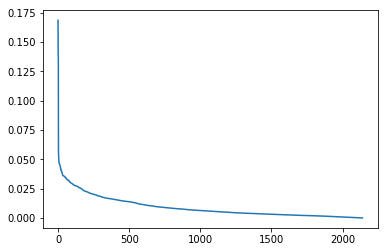

In [477]:
plt.plot(-1*scores)

In [480]:
for i in range(len(docs)):
    print("TWEET #"+str(i))
    print(murray_tweets[docs[i]])
    print("SIMILARITY")
    print(-1 * scores[i])
    print("---------------")

TWEET #0
Today we bring attention to the issue of gun violence &amp; honor the thousands of people who are victims of gun violence every yr. #WearOrange
SIMILARITY
0.02812772708584157
---------------
TWEET #1
NOW: Murray heading to the senate floor to vote in favor of commonsense steps to address gun violence &amp; #DisarmHate https://t.co/g6O0pqWIX9
SIMILARITY
0.01450921174928596
---------------
TWEET #2
I'm heading to the House floor to join @HouseDemocrats in calling for action to end gun violence. #NoBillNoBreak #holdthefloor -PM
SIMILARITY
0.01448230978586523
---------------
TWEET #3
People across WA are calling on Congress to do something to stop the scourge of gun violence. Today, Senators must vote to #DisarmHate
SIMILARITY
0.01440824344897558
---------------
TWEET #4
Acting to end gun violence would save lives. It's nice to see some actual pro-life work being done on the House floor! -PM #NoBillNoBreak
SIMILARITY
0.01431573266347828
---------------
TWEET #5
Murray demands acti

I'm so honored my colleagues put their trust in me to take on the role of Assistant Democratic Leader on the Democratic leadership team. -PM
SIMILARITY
3.0094310246069287e-05
---------------
TWEET #280
When it comes to filling the Supreme Court, Republicans don't want to let the people decide--they want to let Donald Trump decide. #DoYourJob
SIMILARITY
2.9688541936632446e-05
---------------
TWEET #281
Devastating news out of Tacoma. My heart goes out to the family, the city &amp; to every officer working hard to keep our communities safe. -PM
SIMILARITY
2.9107338803397925e-05
---------------
TWEET #282
It's more important than ever for Democrats in the Senate to fight for the people and communities we represent. https://t.co/FiOdQlTitQ
SIMILARITY
2.857428668891885e-05
---------------
TWEET #283
Instead of using misguided policy ideas, this Admin should focus on comprehensive immigration reform to truly address our broken system.
SIMILARITY
2.785326122502562e-05
---------------
TWEET #2

House Dems call on Republicans to disband special committee on @PPFA that's short on facts &amp; LONG on politics - https://t.co/Rtqu8oSPlV
SIMILARITY
1.502390156005901e-05
---------------
TWEET #480
Murray: Washington state voters sent me back to D.C. to fight for their values &amp; priorities and I'm looking forward to getting to work.
SIMILARITY
1.5002192747421873e-05
---------------
TWEET #481
We will keep making our voices heard, we'll fight back against these attacks on our rights &amp; ultimately, you can be sure we will win #TitleX
SIMILARITY
1.497899873549509e-05
---------------
TWEET #482
Murray to GOP on SCOTUS vacancy: Do your job &amp; let me do mine. We owe it to the people we represent &amp; it's the right thing to do. #DoYourJob
SIMILARITY
1.4977884124860443e-05
---------------
TWEET #483
Thank you for sharing your incredible story &amp; continuing to make your voice heard, Marcelas. -PM https://t.co/hHn074lgQL
SIMILARITY
1.4874799866678305e-05
---------------
TWEET #48

---------------
TWEET #780
This shouldn't be a partisan issue. Companies that put workers' safety at risk should be held accountable. https://t.co/v3GX6Hn7Zp
SIMILARITY
8.599731352673889e-06
---------------
TWEET #781
President Trump is filling his cabinet w/ millionaires &amp; billionaires who have shown very little interest in fighting for working families.
SIMILARITY
8.587958260721362e-06
---------------
TWEET #782
As the daughter of a WW II veteran, I know we must honor everyone who has sacrificed for us--not just on #VeteransDay, but every day. -PM
SIMILARITY
8.572979197497842e-06
---------------
TWEET #783
Rs are saying they can take away benefits like maternity care, mental health care, &amp; pre-existing conditions through reconciliation process.
SIMILARITY
8.563751895532113e-06
---------------
TWEET #784
His budget proposals would slash funding for education, investments in jobs &amp; training, support for children, &amp; basic medical research.
SIMILARITY
8.54890617188036e-06

TWEET #1179
Murray expresses concern after meeting w/ Labor Sec. nominee Puzder, calls for hearing to allow outside witnesses https://t.co/7obThcKtWr
SIMILARITY
4.357582901139319e-06
---------------
TWEET #1180
TODAY: Murray in Seattle to talk the burden of student debt &amp; her work to make college more affordable #HigherEd https://t.co/4OG0OmZV3E
SIMILARITY
4.3526185343101785e-06
---------------
TWEET #1181
Murray at @SouthSeattleCC today to tour aerospace lab, talk to trainees about critical training thru fed investments https://t.co/OHa3fK5BmQ
SIMILARITY
4.348008010324565e-06
---------------
TWEET #1182
Since day one of President Trump's Administration, women have led the resistance. #PinkOut https://t.co/FxvR0nZn4M
SIMILARITY
4.346666431288495e-06
---------------
TWEET #1183
We can't stay silent. 

We need to mobilize.

And we have to make our voices heard. https://t.co/uBhj6xCv1M
SIMILARITY
4.339206814751838e-06
---------------
TWEET #1184
President Trump's budget is an attack o

---------------
TWEET #1479
Pres Trump is doing everything he can to put the interests of Wall Street over #workers--&amp; Congressional Republicans are helping him do it.
SIMILARITY
2.4224637189157705e-06
---------------
TWEET #1480
.@CDCgov launches Tips From Former Smokers--edu campaign w/ real people, real stories on the consequences of smoking https://t.co/EbecKbKi0l
SIMILARITY
2.4197137403790885e-06
---------------
TWEET #1481
"Earning less money isn't a choice that women just make" - https://t.co/Ar8lzBjkhx #EqualPay
SIMILARITY
2.4153056494526434e-06
---------------
TWEET #1482
New study shows odds of having a child w/ microcephaly as a result of #Zika could be as high as 13% for women infected in the 1st trimester.
SIMILARITY
2.4103097756055706e-06
---------------
TWEET #1483
RT @IandRAffairs: Need help applying for #citizenship? Come to our 10/15 workshop. Volunteers can assist w/ your N-400 application. https:/...
SIMILARITY
2.3903454533799403e-06
---------------
TWEET #1484


TWEET #1754
On #MLKDay Murray urged more to get involved, serve, to not remain quiet when they see injustice https://t.co/U9VbOexW2i via @thenewstribune
SIMILARITY
1.103370449874809e-06
---------------
TWEET #1755
Congrats to Ryan Lafferty! This WA physics teacher just won a national, $25,000 Milken Educator Award: https://t.co/fpnRH2flmq
SIMILARITY
1.0953050469518726e-06
---------------
TWEET #1756
Murray honored at 29th Annual @NCLR Capital Award for work w/ @SenAlexander to fix No Child Left Behind #NCLRCaps16 https://t.co/D4Df55Awfx
SIMILARITY
1.0951147382842355e-06
---------------
TWEET #1757
Murray pushes for affordable higher education bill - https://t.co/DlUkOC3iCg #HigherEd
SIMILARITY
1.0941211593813495e-06
---------------
TWEET #1758
If AG #Sessions lied &amp; misled the American people during his confirmation hearing, he should resign.
SIMILARITY
1.0919785733451485e-06
---------------
TWEET #1759
If AG #Sessions lied to mislead the American people during his confirmation hea

---------------
TWEET #1950
Happy holidays! We were thrilled to help @USMC &amp; @ToysForTots_USA spread holiday cheer to kids this season. https://t.co/7BKQgaL35i
SIMILARITY
3.873148965133036e-07
---------------
TWEET #1951
Murray on The Rural Disaster Recovery Act: "We should not wait for the next wildfire season to act." https://t.co/Ho7fdOrqPx
SIMILARITY
3.8598239082530386e-07
---------------
TWEET #1952
If the wage gap were eliminated, on avg, a working woman would have enough money for 11 more months of rent &amp; 15 mo... https://t.co/I12JDh9xvK
SIMILARITY
3.857722473982861e-07
---------------
TWEET #1953
Thank you to some of WA's biggest outdoor champions. Looking fwd to getting this Alpine Lakes Wilderness sign up! https://t.co/eLddBNTDil
SIMILARITY
3.8489950804925753e-07
---------------
TWEET #1954
RT @PNNLab: At @PacSci, Sen. @PattyMurray (with the sun at her back) kicks off the discussion for #STEM education https://t.co/IBdf1gIGtn
SIMILARITY
3.8468573079321444e-07
--------